import pickle
# ^^^ pyforest auto-imports - don't write above this line
**EDA for NHL Game Data**

# Imports 

## Libraries

In [1]:
import mysql.connector
import requests
from config import *
from functions import *
import csv
from IPython.display import Audio
import numpy as np
framerate = 4410
play_time_seconds = 3
t = np.linspace(0, play_time_seconds, framerate*play_time_seconds)
audio_data = np.sin(2*np.pi*300*t) + np.sin(2*np.pi*240*t)


Bad key "text.kerning_factor" on line 4 in
/Users/gregfeliu/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


## Data

In [2]:
with open ("../data/all_event_types", 'rb') as f:
    all_event_types = pickle.load(f)

<IPython.core.display.Javascript object>

In [3]:
all_event_types

[('event',),
 ('Period Ready',),
 ('Period Start',),
 ('Faceoff',),
 ('Blocked Shot',),
 ('Hit',),
 ('Stoppage',),
 ('Shot',),
 ('Giveaway',),
 ('Penalty',),
 ('Takeaway',),
 ('Missed Shot',),
 ('Period End',),
 ('Period Official',),
 ('Goal',),
 ('Game End',),
 ('Game Scheduled',),
 ('Game Official',),
 ('Official Challenge',),
 ('Shootout Complete',),
 ('Early Intermission Start',),
 ('Early Intermission End',),
 ('Emergency Goaltender',)]

In [4]:
table_info_df = pd.read_csv("../data/table_info_df.csv", index_col=0)

In [5]:
tables = table_info_df['Table'].unique()
tables

array(['game', 'game_goalie_stats', 'game_plays', 'game_plays_players',
       'game_shifts', 'game_skater_stats', 'game_teams_stats',
       'player_info', 'team_info'], dtype=object)

In [6]:
# table_info_df[0:60]
table_info_df[60:] 

,Column_name,Column_type,Table,Number_of_unique_values
60,game_id,int(11),game_shifts,11339
61,player_id,int(11),game_shifts,2212
62,period,int(11),game_shifts,7
63,shift_start,int(11),game_shifts,5911
64,shift_end,int(11),game_shifts,5913
65,game_id,int(11),game_skater_stats,11435
66,player_id,int(11),game_skater_stats,1999
67,team_id,int(11),game_skater_stats,34
68,timeOnIce,int(11),game_skater_stats,2220
69,assists,int(11),game_skater_stats,6


In [7]:
table_info_df[table_info_df['Column_name'] == 'team_id']

,Column_name,Column_type,Table,Number_of_unique_values
18,team_id,int(11),game_goalie_stats,34
67,team_id,int(11),game_skater_stats,34
88,team_id,int(11),game_teams_stats,34
110,team_id,int(11),team_info,17


In [8]:
unique_col_names = list(table_info_df['Column_name'].unique())

# What years are in this dataset

In [38]:
seasons = "SELECT DISTINCT(season) FROM game;"
seasons_query_result = run_query(seasons)
all_seasons = [a[0] for a in seasons_query_result]
# all_seasons # exclude 0

[0,
 20112012,
 20102011,
 20122013,
 20162017,
 20142015,
 20152016,
 20132014,
 20172018,
 20182019]

## How many games each season?

In [ ]:
all_game_ids_query = "SELECT DISTINCT(game_id) FROM game;"
all_game_ids_query_result = run_query(all_game_ids_query)
all_game_ids = [a[0] for a in all_game_ids_query_result]
len(all_game_ids) # exclude 0

In [ ]:
# Separating game_ids by year
number_of_games_by_year = {}
for game in all_game_ids:
    year = str(game)
    if len(year) > 1:
        if number_of_games_by_year.get(year[0:4]) == None:
            number_of_games_by_year[year[0:4]] = 1
        else:
            number_of_games_by_year[year[0:4]] += 1

In [ ]:
sorted_years_and_num_games = []
for i in sorted (number_of_games_by_year) : 
    sorted_years_and_num_games.append((i, number_of_games_by_year[i])) 
len(sorted_years_and_num_games) # 9 seasons covered in data

### Bar plot of number of games in each season

In [ ]:
# 2012 had the olympics which removed one month of play mid-season
# I assume the variation in number of games since has to do with number of necessary playoff games
num_of_games_in_season = sns.barplot(x = [i[0] for i in sorted_years_and_num_games],
                                    y = [i[1] for i in sorted_years_and_num_games], ci=None)
# num_of_games_in_season.figure.savefig("../images/number_of_games_per_season.png")

## Approximately how much game time is covered

In [ ]:
# total number of games
reg_hours_played = table_info_df[(table_info_df['Column_name'] == 'game_id') & \
                                 (table_info_df['Table'] == 'game')]['Number_of_unique_values']
print(reg_hours_played[0])
# at least 5,718 hours of game play (plus any additional overtime)

# Time Played plus OT 

In [ ]:
game_time = """
            SELECT game_id, COUNT(DISTINCT(period))
            FROM game_plays
            GROUP BY game_id

"""
game_time_query_result = run_query(game_time)
# games_and_periods = [a[0:2] for a in game_time_query_result]
# all_seasons # exclude 0

In [ ]:
games_and_periods[0:5]

In [ ]:
game_time_query_result[0:4]

In [ ]:
ot_game_count = {}
for game, period_count in game_time_query_result:
    if period_count > 3:
        if ot_game_count.get(period_count) == None:
            ot_game_count[period_count] = 1
        else:
            ot_game_count[period_count] += 1

In [ ]:
ot_game_count

In [ ]:
# number of minutes guarenteed to have been played
total_guarenteed_extra_minutes = 0
for key,value in ot_game_count.items():
    if key == 6:
        total_guarenteed_extra_minutes += value * (60 * 2)
    elif key == 5:
        total_guarenteed_extra_minutes += value * (60 * 2)
total_guarenteed_extra_minutes

In [ ]:
total_guarenteed_extra_hours = total_guarenteed_extra_minutes / 60
total_guarenteed_extra_hours

In [ ]:
# at least 8,108 hours of hockey covered in this data 
minimum_total_hours_played = total_guarenteed_extra_hours + reg_hours_played[0]
minimum_total_hours_played

# Total Goals By Period 

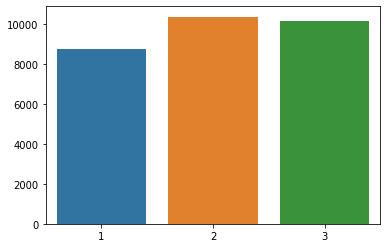

In [28]:
goals_query = get_total_period_sum('goal')
goals_plot = make_barplot_of_variable_by_period(goals_query)

In [29]:
goal_df = get_raw_data('goal')
goal_df.to_csv("../data/goals.csv")

In [32]:
avg_goals = goal_df.groupby("period").goal.mean()

In [35]:
# 5% more goals in second than first 
avg_goals[2] / avg_goals[1]

1.049877555237007

# Total Faceoffs by Period

In [ ]:
faceoff_query = get_total_period_sum('faceoff')
faceoff_plot = make_barplot_of_variable_by_period(faceoff_query)

In [ ]:
faceoff_df = get_raw_data('faceoff')
faceoff_df.to_csv("../data/faceoffs.csv")

# Penalties by Period 

In [ ]:
penalty_query = get_total_period_sum('penalty')
penalty_plot = make_barplot_of_variable_by_period(penalty_query)

In [ ]:
penalty_df = get_raw_data('penalty')
penalty_df.to_csv("../data/penalties.csv")

# Shots By Period

In [ ]:
shot_query = get_total_period_sum('shot')
shot_plot = make_barplot_of_variable_by_period(shot_query)
# shot_plot.figure.savefig("../images/number_of_shots_by_period.png")

In [ ]:
shot_df = get_raw_data('shot')
shot_df.to_csv("../data/shots.csv")

# Average Shift Length by Period

In [ ]:
avg_shift_len_by_period = f"""
            SELECT period, AVG(shift_end - shift_start)
            FROM game_shifts
            WHERE period < 4 AND period > 0
            GROUP BY period
"""
avg_shift_len_by_period_query_result = run_query(avg_shift_len_by_period)

In [ ]:
avg_shift_len_by_period = []
for x in avg_shift_len_by_period_query_result:
    avg_shift_len_by_period.append([x[0], float(x[1])])

In [ ]:
make_barplot_of_variable_by_period(avg_shift_len_by_period)

## D

In [ ]:
d_shift_len_by_period = f"""
            SELECT period, shift_end - shift_start, player_info.primaryPosition, game_id
            FROM game_shifts
            INNER JOIN player_info
            ON game_shifts.player_id = player_info.player_id
            WHERE period < 4 
            AND period > 0
            AND player_info.primaryPosition = 'D'
"""
d_shift_len_by_period_query_result = run_query(d_shift_len_by_period)

In [ ]:
len(d_shift_len_by_period_query_result)

In [ ]:
all_position_results = []

In [ ]:
d_result = get_shift_len_by_position('D')
all_position_results.append(d_result)

## LW

In [ ]:
lw_result = get_shift_len_by_position('LW')
all_position_results.append(lw_result)

## RW

In [ ]:
rw_result = get_shift_len_by_position('RW')
all_position_results.append(rw_result)

## C

In [ ]:
c_result = get_shift_len_by_position('C')
all_position_results.append(c_result)

## Combining data into a list

### Make data into csv 
https://blog.finxter.com/how-to-convert-a-list-of-lists-to-a-csv-file-in-python/

d_shift_len_df = pd.DataFrame(data = d_shift_len_by_period_query_result, columns = ['period', 'shift_len', 'position', 'game_id'])

In [ ]:
positions_in_order = ['D', 'LW', "RW", "C"]

In [ ]:
for idx, query_result in enumerate(all_position_results):
    position_name = positions_in_order[idx]
    file_name = f"../data/{position_name}_shifts.csv"
    with open(file_name, 'w', newline='') as f:
        writer = csv.writer(f)
        writer.writerows(query_result)

with open('../data/d_shits.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerows(d_shift_len_by_period_query_result)

### Combining csvs to one csv

In [ ]:
file_name = f"../data/all_positions_shifts.csv"
with open(file_name, 'w', newline='') as f:
    for idx, query_result in enumerate(all_position_results):
        writer = csv.writer(f)
        writer.writerows(query_result)

# Winger shift length by period and home/away team  

In [ ]:
lw_shift_len_by_period_away = f"""
            SELECT period, shift_end - shift_start, player_info.primaryPosition, game_shifts.game_id
            FROM game_shifts
            INNER JOIN player_info
            ON game_shifts.player_id = player_info.player_id
                INNER JOIN game_skater_stats
                ON player_info.player_id = game_skater_stats.player_id
                    INNER JOIN game
                    ON game_skater_stats.team_id = game.away_team_id
            WHERE period BETWEEN 1 AND 3
            AND player_info.primaryPosition = 'LW'
"""
lw_shift_len_by_period_away_query_result = run_query(lw_shift_len_by_period_away)

In [ ]:
lw_shift_len_by_period_away_query_result[0:3]

## Viewing data for one team and home v. away

In [ ]:
# narrowing data to one team
single_team = f"""
            SELECT DISTINCT (teamName), team_id
            FROM team_info;
"""
single_team_query_result = run_query(single_team) # rangers are 3

In [ ]:
wing_shift_len_by_period = f"""
            SELECT game_shifts.period, shift_end - shift_start, player_info.primaryPosition, game_teams_stats.HOA
            FROM game_shifts
            INNER JOIN game_teams_stats
                ON game_shifts.game_id = game_teams_stats.game_id
                    INNER JOIN player_info
                        ON game_shifts.player_id = player_info.player_id
            WHERE game_teams_stats.team_id = 3 AND 
            game_shifts.period BETWEEN 1 AND 3
            AND (player_info.primaryPosition = 'LW' OR player_info.primaryPosition = 'RW')
"""
wing_shift_len_by_period_query_result = run_query(wing_shift_len_by_period)

In [ ]:
len(wing_shift_len_by_period_query_result)
wing_shift_df = pd.DataFrame(data = wing_shift_len_by_period_query_result, 
                             columns = ['period', "shift_len", 'position', "HoA"])
# wing_shift_df.to_csv("../data/shift_length_by_position_home_or_away.csv")

## Only for the seasons after 2014

In [54]:
# only after 2014 b/c that's when home-team-gets-last-change rule went into effect 
wing_shift_len_by_period_post2014 = f"""
            SELECT game_shifts.period, shift_end - shift_start, player_info.primaryPosition, 
                    game_teams_stats.HOA
            FROM game_shifts
            INNER JOIN game_teams_stats
                ON game_shifts.game_id = game_teams_stats.game_id
                    INNER JOIN player_info
                        ON game_shifts.player_id = player_info.player_id
            WHERE game_teams_stats.team_id = 3 AND 
            game_shifts.period BETWEEN 1 AND 3
            AND (player_info.primaryPosition = 'LW' OR 
            player_info.primaryPosition = 'RW')
            AND game_shifts.game_id > 2014000000
"""
wing_shift_len_by_period_post2014_query_result = run_query(wing_shift_len_by_period_post2014)

In [55]:
len(wing_shift_len_by_period_post2014_query_result)

160377

In [56]:
wing_shift_df_post2014 = pd.DataFrame(data = wing_shift_len_by_period_post2014_query_result, 
                             columns = ['period', "shift_len", 'position', "HoA"])
# wing_shift_df_post2014.to_csv("../data/shift_length_by_position_home_or_away_post2014.csv")

## Pre 2014

In [57]:
wing_shift_len_by_period_pre2014 = f"""
            SELECT game_shifts.period, shift_end - shift_start, player_info.primaryPosition, 
                    game_teams_stats.HOA
            FROM game_shifts
            INNER JOIN game_teams_stats
                ON game_shifts.game_id = game_teams_stats.game_id
                    INNER JOIN player_info
                        ON game_shifts.player_id = player_info.player_id
            WHERE game_teams_stats.team_id = 3 AND 
            game_shifts.period BETWEEN 1 AND 3
            AND (player_info.primaryPosition = 'LW' OR 
            player_info.primaryPosition = 'RW')
            AND game_shifts.game_id < 2014000000
"""
wing_shift_len_by_period_pre2014_query_result = run_query(wing_shift_len_by_period_pre2014)

In [60]:
len(wing_shift_len_by_period_pre2014_query_result)

105597

In [59]:
wing_shift_df_pre2014 = pd.DataFrame(data = wing_shift_len_by_period_pre2014_query_result, 
                             columns = ['period', "shift_len", 'position', "HoA"])
# wing_shift_df_pre2014.to_csv("../data/shift_length_by_position_home_or_away_pre2014.csv")

# Takeaways

In [ ]:
takeaway_query = get_total_period_sum('Takeaway')
takeaway_plot = make_barplot_of_variable_by_period(takeaway_query)

takeaway_df = get_raw_data('Takeaway')
takeaway_df.to_csv("../data/takeaways.csv")

# Giveaways

In [ ]:
giveaway_query = get_total_period_sum('Giveaway')
giveaway_plot = make_barplot_of_variable_by_period(giveaway_query)

giveaway_df = get_raw_data('Giveaway')
giveaway_df.to_csv("../data/giveaways.csv")

# Blocked Shots

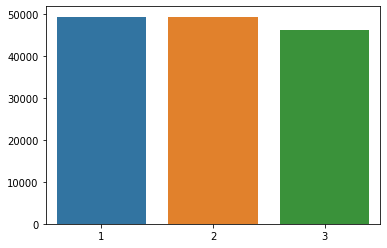

In [27]:
blocked_shot_query = get_total_period_sum('Blocked Shot')
blocked_shot_plot = make_barplot_of_variable_by_period(blocked_shot_query)

blocked_shot_df = get_raw_data('Blocked Shot')
blocked_shot_df.to_csv("../data/blocked_shots.csv")

# Save Percentage 

## Count of rows in each table

In [ ]:
count_game = f"SELECT COUNT(*) FROM game;"
count_game_query_result = run_query(count_game)
count_game_query_result

In [ ]:
count_game_plays = f"SELECT COUNT(*) FROM game_plays;"
count_game_plays_query_result = run_query(count_game_plays)
count_game_plays_query_result

## The Query

In [ ]:
# home team save pct by period (just the rangers)
home_save_pct_by_period = f"""
            SELECT A.period, COUNT(A.event), COUNT(B.event)
            FROM game_plays A, game_plays B 
            INNER JOIN game C
                ON A.game_id = C.game_id 
                INNER JOIN game D 
                    ON A.team_id_against = D.home_team_id
            WHERE B.team_id_against = 3
            AND A.period BETWEEN 1 AND 3
            AND A.event = 'Goal'
            AND B.event = 'Shot'
            GROUP BY A.game_id, A.period
"""
home_save_pct_by_period_query_result = run_query(home_save_pct_by_period)
# os.system("printf '\a'") # or '\7'
Audio(audio_data, rate=framerate, autoplay=True)

In [ ]:
home_save_pct_by_period_query_result

In [ ]:
grouped_home_save_pct = []
for x in home_save_pct_by_period_query_result:
    save_pct = 1 - (x[1] / x[2])
    list_x = list(x)
    list_x.append(save_pct)
    grouped_home_save_pct.append(list_x)

In [ ]:
grouped_home_save_pct

## Simplified Query

In [17]:
save_pct_by_period = """
            SELECT game_plays.period, COUNT(game_plays.event)
            FROM game_plays
            WHERE game_plays.period BETWEEN 1 AND 3
            AND game_plays.event = 'Shot'
            GROUP BY game_plays.period
"""
save_pct_by_period_query_result = run_query(save_pct_by_period)
Audio(audio_data, rate=framerate, autoplay=True)

## Finding save pct by period

In [22]:
save_pct_list = []
for shot in save_pct_by_period_query_result:
    for goal in goals_query:
        if shot[0] == goal[0]:
            num_of_saves = shot[1] - goal[1]
            save_pct = num_of_saves / shot[1]
            print(f"Save percentage for period {shot[0]} is \
                  {round(save_pct, 4)}")
            save_pct_list.append(round(save_pct, 4))

Save percentage for period 1 is                   0.9087
Save percentage for period 2 is                   0.8959
Save percentage for period 3 is                   0.8878


In [26]:
# with open ("../data/save_pct_list", 'wb') as f:
#     pickle.dump(save_pct_list, f)

<IPython.core.display.Javascript object>

# Hits 

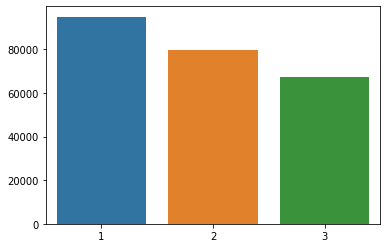

In [10]:
hits_query = get_total_period_sum('Hit')
hits_plot = make_barplot_of_variable_by_period(hits_query)

hits_df = get_raw_data('Hit')
hits_df.to_csv("../data/hits.csv")

# Number of Stoppages

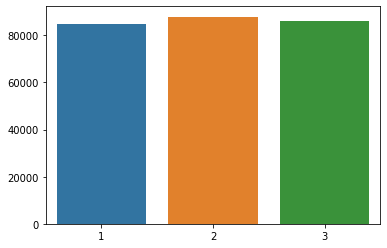

In [12]:
stoppage_query = get_total_period_sum('Stoppage')
stoppage_plot = make_barplot_of_variable_by_period(stoppage_query)

stoppage_df = get_raw_data('Stoppage')
# stoppage_df.to_csv("../data/stoppages.csv")

## Stoppages Per Game

In [15]:
# 5,718 hours played in regulation
stoppage_avg = stoppage_df.groupby(['period']).Stoppage.mean()
stoppage_avg * 3

period
1    22.641847
2    23.463962
3    22.996975
Name: Stoppage, dtype: float64